In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [6]:
df.shape

(528, 15)

In [8]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

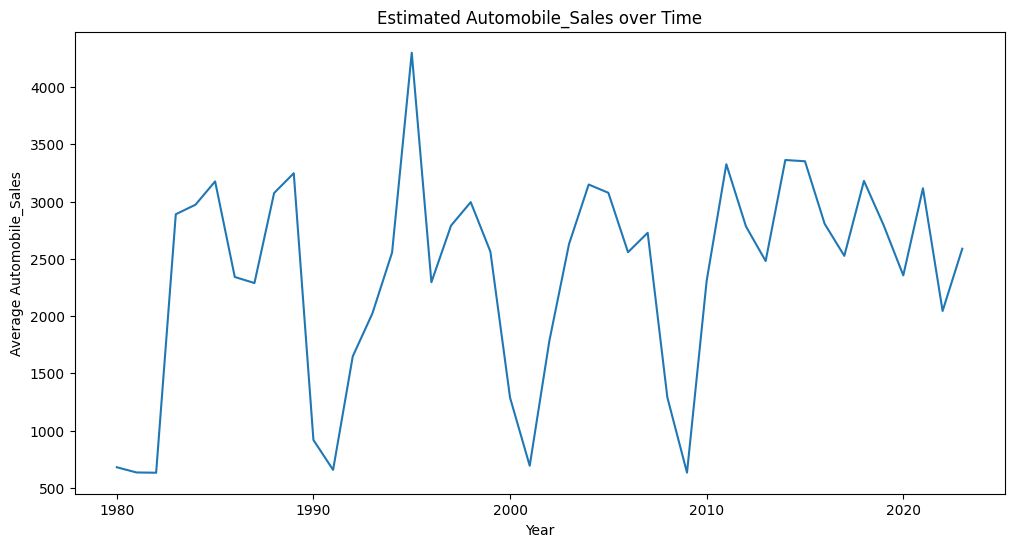

In [10]:
    ##TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year
    ##TASK 1.1: Let's try to understand the change in average Automobile_Sales over time
    plt.figure(figsize=(12, 6))
    # Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
    df_new = df.groupby('Year')['Automobile_Sales'].mean()
    # Plotting the data
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year')
    plt.ylabel('Average Automobile_Sales')
    plt.title('Estimated Automobile_Sales over Time')
    plt.show()

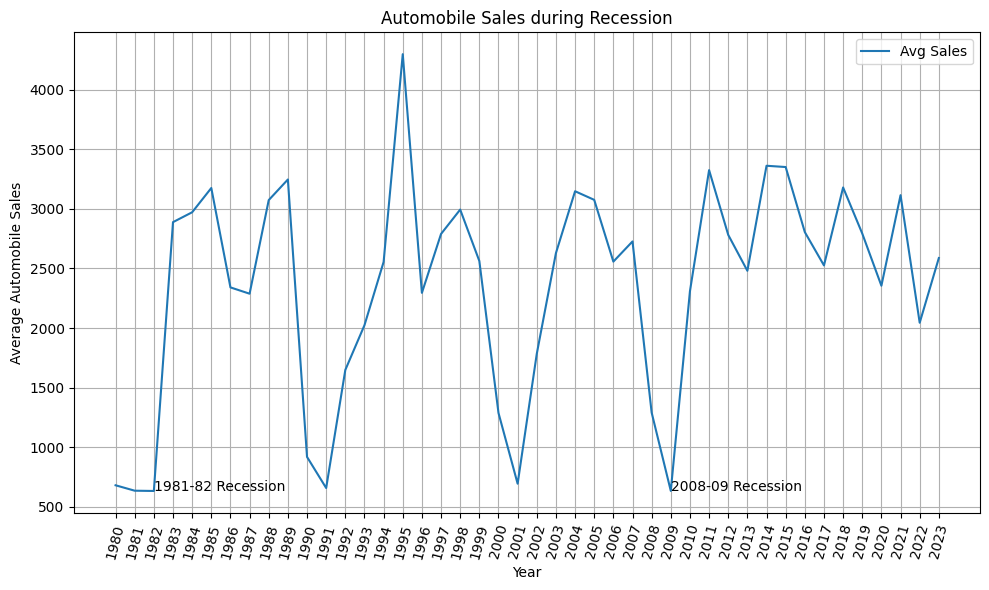

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample preparation (assuming df is already loaded and includes a 'Year' column and 'Automobile_Sales')
# Replace 'Automobile_Sales' with your actual column name if different

plt.figure(figsize=(10, 6))

# Group data by Year and calculate average automobile sales
df_line = df.groupby('Year')['Automobile_Sales'].mean()

# Plot the data
df_line.plot(kind='line')

# Set x-axis ticks from 1980 to 2023, rotating labels for clarity
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')

# Annotations for known recession years
plt.text(1982, df_line.get(1982, 500), '1981-82 Recession')
plt.text(2009, df_line.get(2009, 500), '2008-09 Recession')

plt.grid(True)
plt.legend(['Avg Sales'])
plt.tight_layout()
plt.show()


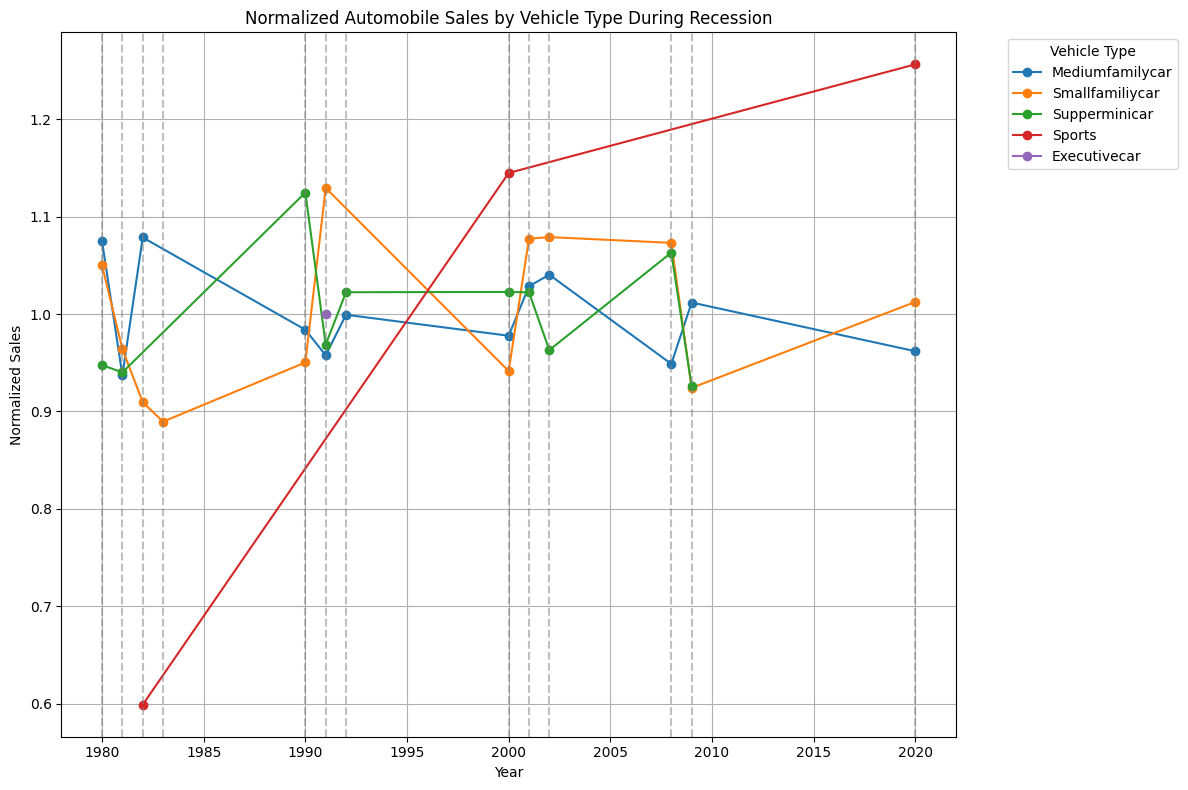

In [12]:
##TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?
import matplotlib.pyplot as plt

# Filter data for recession years
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Normalize the sales by vehicle type (each vehicle type's average becomes 1.0 baseline)
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set 'Year' as index for plotting
df_Mline.set_index('Year', inplace=True)

# Plot each vehicle type's normalized sales trend
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Final plot formatting
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.grid(True)
plt.tight_layout()
plt.show()


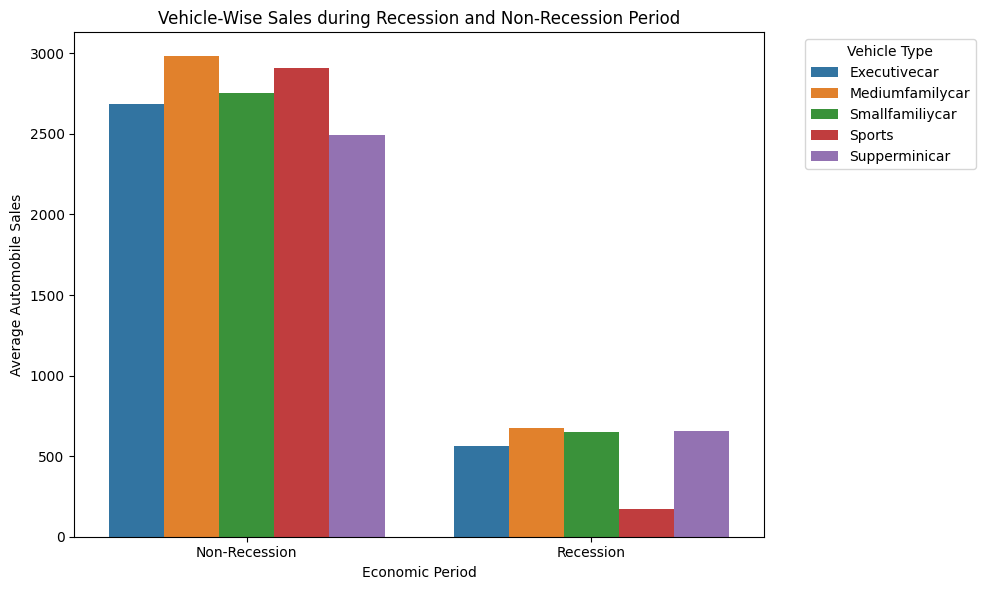

In [13]:
##TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Recession status and Vehicle Type to calculate mean sales
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)

# Customize the x-axis labels
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

# Set labels and title
plt.xlabel('Economic Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

# Display the plot
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


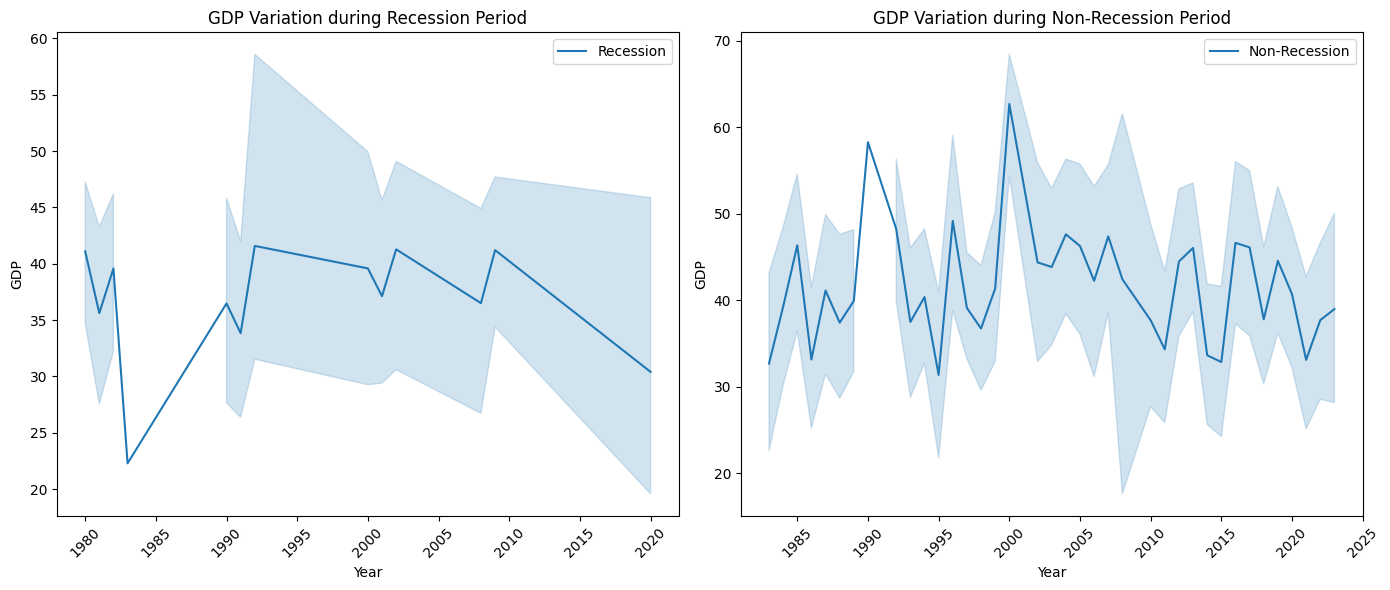

In [14]:
##TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create the figure and subplots
fig = plt.figure(figsize=(14, 6))

# Subplot for recession period
ax0 = fig.add_subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
ax0.tick_params(axis='x', rotation=45)

# Subplot for non-recession period
ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


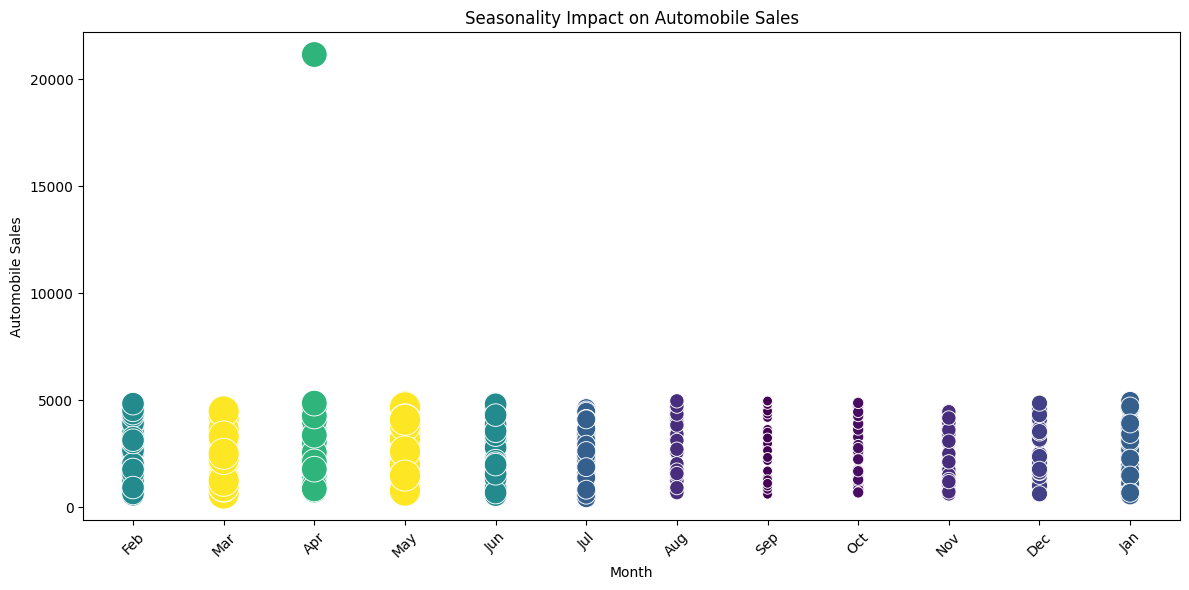

In [15]:
##TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
import matplotlib.pyplot as plt
import seaborn as sns

# Filter non-recession data
non_rec_data = df[df['Recession'] == 0]

# Bubble size
size = non_rec_data['Seasonality_Weight']

# Create the bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=non_rec_data,
    x='Month',
    y='Automobile_Sales',
    size=size,
    hue='Seasonality_Weight',
    palette='viridis',
    legend=False,
    sizes=(50, 500)  # min and max bubble sizes
)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


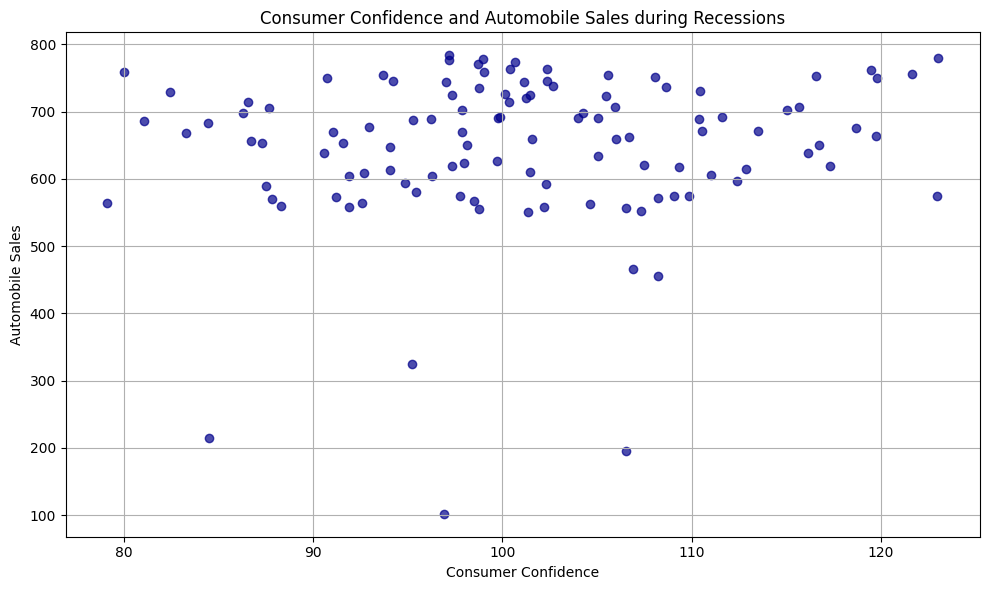

In [16]:
##TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
import matplotlib.pyplot as plt

# Filter data for recession period
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], color='darkblue', alpha=0.7)

# Add labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.grid(True)
plt.tight_layout()
plt.show()


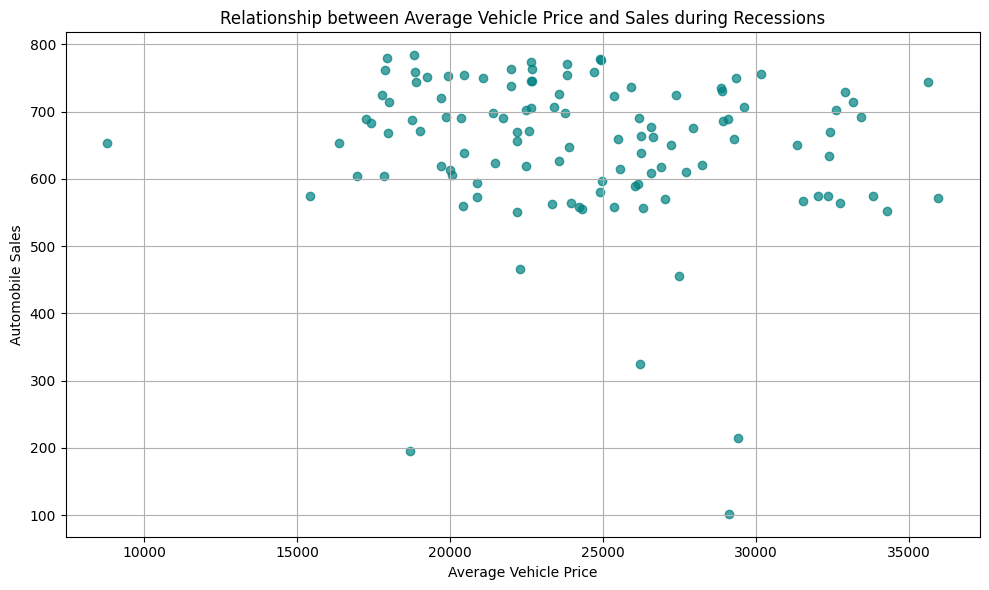

In [17]:
import matplotlib.pyplot as plt

# Filter data for recession period
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], color='teal', alpha=0.7)

# Add labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.grid(True)
plt.tight_layout()
plt.show()


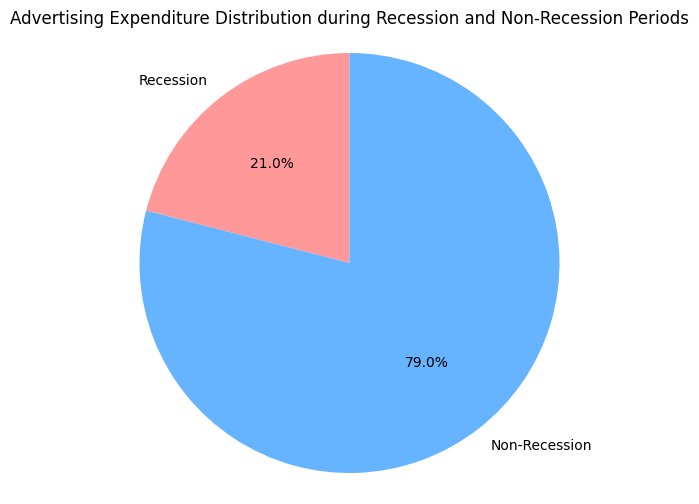

In [18]:
##TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
import matplotlib.pyplot as plt

# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Advertising Expenditure Distribution during Recession and Non-Recession Periods')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


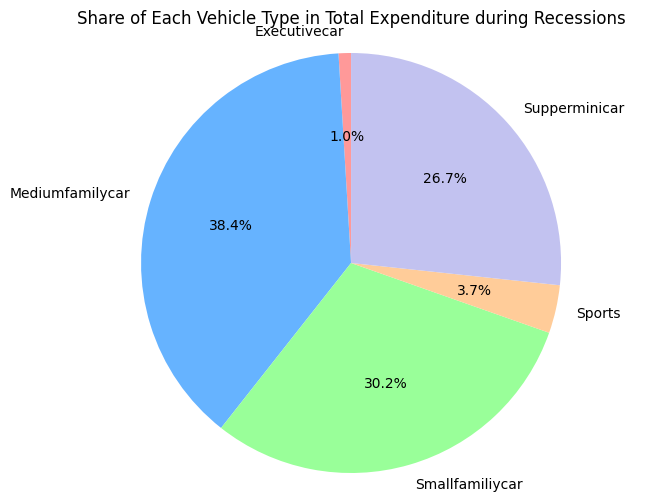

In [19]:
import matplotlib.pyplot as plt

# Filter the data for recession period
Rdata = df[df['Recession'] == 1]

# Calculate the advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Customize colors if needed

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


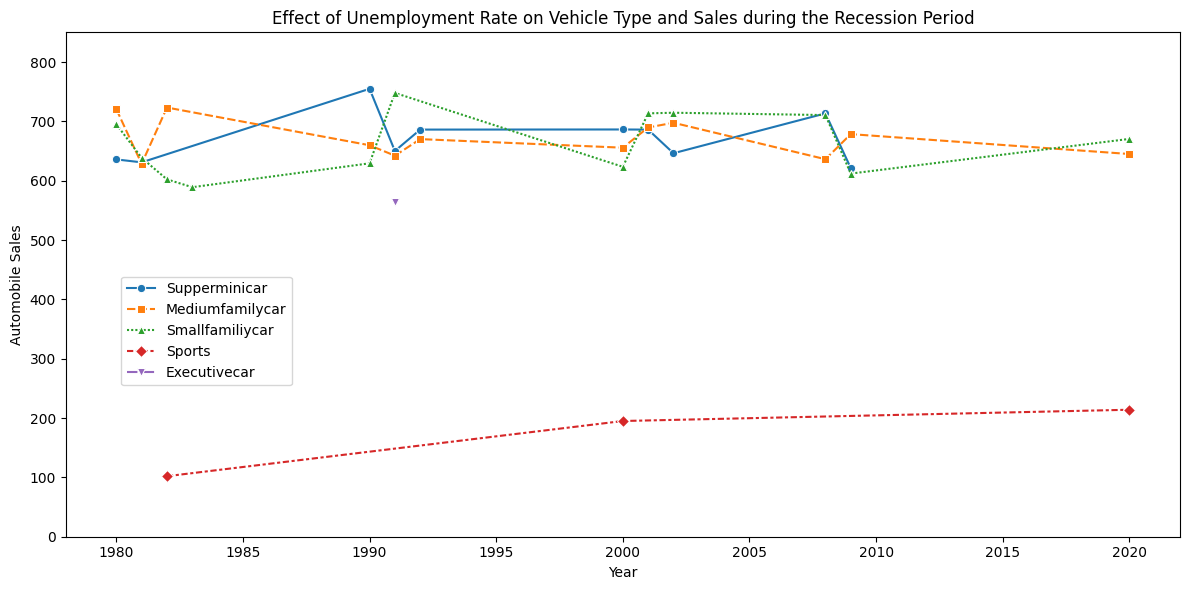

In [22]:
##### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for recession period
df_rec = df[df['Recession'] == 1]

# Define different markers for each vehicle type
markers = ['o', 's', '^', 'D', 'v']  # Add more if you have more vehicle types

# Create a lineplot to analyze the effect of the unemployment rate on vehicle type and sales during the recession
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales', 
             hue='Vehicle_Type', style='Vehicle_Type', markers=markers, err_style=None)

# Set the y-axis limits
plt.ylim(0, 850)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during the Recession Period')

# Show the legend
plt.legend(loc=(0.05, .3))

# Show the plot
plt.tight_layout()
plt.show()
